# Title: Attack Graph Metrics
### Purpose: Snippets to review published AG Metrics
### Author: @mjz


## Background/Sec0


In [1]:

%%bash
/opt/projects/diss/py-mulval/src/run_boromir.py --benchmarks=shortest_attack_path --benchmark_config_file=test_flags_in_config.yml --secmet_plot_intermediate_graphs --secmet_fix_cvss_score=1 

/tmp/mulpy/runs/3716287f/single_host_1.csv

-------------------------BOROMIR Results Summary-------------------------
SHORTEST_ATTACK_PATH:
  all_paths_before="[["18", "16", "15", "14", "13", "11", "10", "9", "8", "6", "5", "4", "3", "2", "1"], ["18", "16", "15", "14", "13", "23", "5", "4", "3", "2", "1"]]" attack_graph_name="single_host_1" citation="Marc Dacier, Yves Deswarte, and Mohamed Kaâniche. 1996. Quantitative assessment of operational security: Models and tools. Information Systems Security, ed. by SK Katsikas and D. Gritzalis, London, Chapman & Hall (1996), 179–86." cite_key="dacier1996" run_number="0" shortest_path_length_after="4" shortest_path_length_before="11"
  Shortest Path Length                  4.000000 path length                   
  End to End Runtime                    1.229719 seconds                       

-------------------------
For all tests: all_paths_after="[['13', '5', '3', '1'], ['13', '8', '5', '3', '1']]" shortest_path_after="['13', '5', '3', '1']" 

2020-01-28 18:52:48,555 3716287f MainThread INFO     Verbose logging to: /tmp/mulpy/runs/3716287f/pkb.log
2020-01-28 18:52:48,556 3716287f MainThread INFO     PerfKitBenchmarker version: unknown
2020-01-28 18:52:48,556 3716287f MainThread INFO     Flag values:
--benchmark_config_file=test_flags_in_config.yml
--secmet_plot_intermediate_graphs
--secmet_fix_cvss_score=1.0
--benchmarks=shortest_attack_path
2020-01-28 18:52:48,574 3716287f MainThread INFO     Running: ssh-keygen -t rsa -N  -m PEM -q -f /tmp/mulpy/runs/3716287f/py_mulval_keyfile
2020-01-28 18:52:48,662 3716287f MainThread INFO     Setting --max_concurrent_threads=200.
2020-01-28 18:52:48,716 3716287f MainThread shortest_attack_path(1/1) INFO     Provisioning resources for benchmark shortest_attack_path
2020-01-28 18:52:48,716 3716287f MainThread shortest_attack_path(1/1) INFO     Preparing benchmark shortest_attack_path
2020-01-28 18:52:48,716 3716287f MainThread shortest_attack_path(1/1) INFO     Running benchmark shortest_

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import sys
import networkx as nx
import graphviz


import numpy as np
from itertools import chain

py_mulval_path = r'/opt/projects/diss/py-mulval/src'
sys.path.append(py_mulval_path)

from py_mulval.attack_graph import AttackGraph

def plot_ag(ag):
    A = nx.nx_agraph.to_agraph(ag)
    # A.layout('dot', args='-Nfontsize=10 -Nwidth=".2" -Nheight=".2" -Nmargin=0 -Gfontsize=8')
    args = """
    -Gsize=17
    -Nfontname=Roboto
    -Efontname=Roboto
    -Nfontsize=14
    -Efontsize=14
    """
    A.layout('dot', args=args )
    # A.draw(self.outputDir + '/' + outfilename)
    A.draw()
    # plt.show()
    return graphviz.Source(A.to_string())

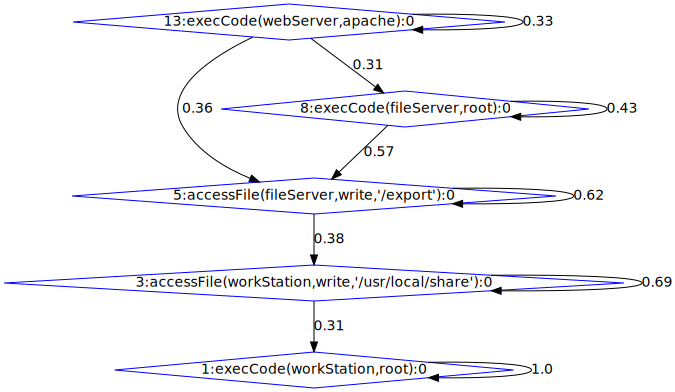

In [3]:
ag = AttackGraph()
ag.load_dot_file('/opt/projects/diss/py-mulval/data/mulval_ag/small_enterprise/AttackGraph.dot')
ag.name = 'small_enterprise'
ag.load_score_dict('/opt/projects/diss/py-mulval/data/scoreDict.yml')
ag.PLOT_INTERMEDIATE_GRAPHS = False

tgraph, tmatrix, nodelist = ag.getTransMatrix()

plot_ag(tgraph)

# plot_ag(ag)


In [4]:
print(np.vstack((nodelist, np.round_(tmatrix.todense(), decimals=2))))

[['13' '8' '5' '3' '1']
 ['0.33' '0.31' '0.36' '0.0' '0.0']
 ['0.0' '0.43' '0.57' '0.0' '0.0']
 ['0.0' '0.0' '0.62' '0.38' '0.0']
 ['0.0' '0.0' '0.0' '0.69' '0.31']
 ['0.0' '0.0' '0.0' '0.0' '1.0']]


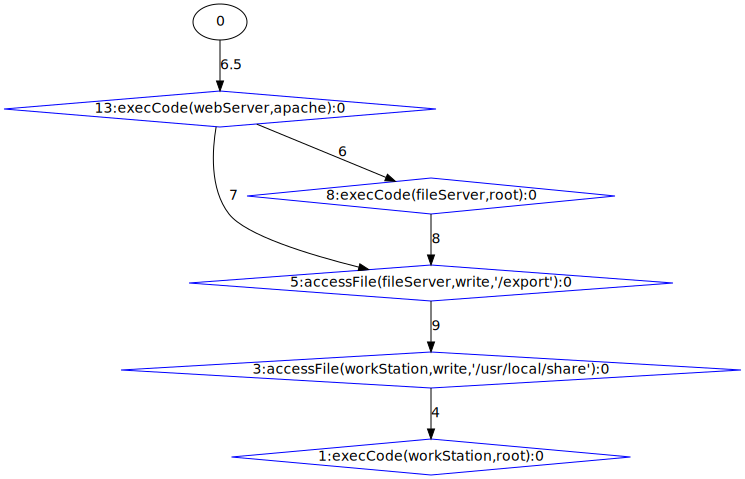

In [5]:
reduced_ag = ag.getReducedGraph()
plot_ag(reduced_ag)


## Mean Time to Failure (mttf_dacier_1994)
Dacier\cite{Dacier_1994, Dacier_1996}:

Dacier's privilege graph model assumes the probability to succeed in a given attack before time $t$ is described by an exponential distribution given by: 

$P(t) = 1-exp(-\lambda t) $  

Transition rate $\lambda$ estimates the effort and time, with mean time for an attack to succeed given by 

$\frac{1}{\lambda}$.

The mean time $T_j$ spent in state $j$ is:

$T_j = 1 / \sum\limits_{i\in out(j)}\lambda_{ji}$

... and the $MTTF_k$ is mean time to failure when state $k$ is the initial state and $P_{k1}$ the conditional probability from state $k$ to state $1$:

$MTTF_k = T_k + \sum\limits_{1\in out(k)}P_{k1} ; P_{k1}=\lambda_{k1} \times T_k$


The shortest path is:

$\textbf{SP} = min(MTTF_k)$  for all possible paths


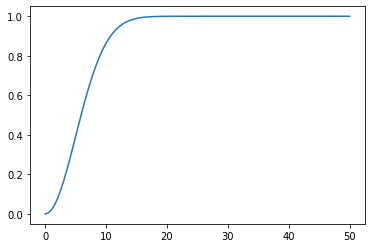

In [6]:
from scipy.stats import expon

fig, ax = plt.subplots(1, 1)

# mean time to fire transitions:
# .0002 is quasi-instantanious
# .02 is 1 hour
# .2 1 day
# 1 is 1 week
# 5 is one month
# 50 is one year
x = np.linspace(.0002, 50, 100)
lamb = np.linspace(0.0001,.9999, 100)
# print(x)
ax.plot(x, 1 - expon.pdf(x * lamb), label='P(t)')

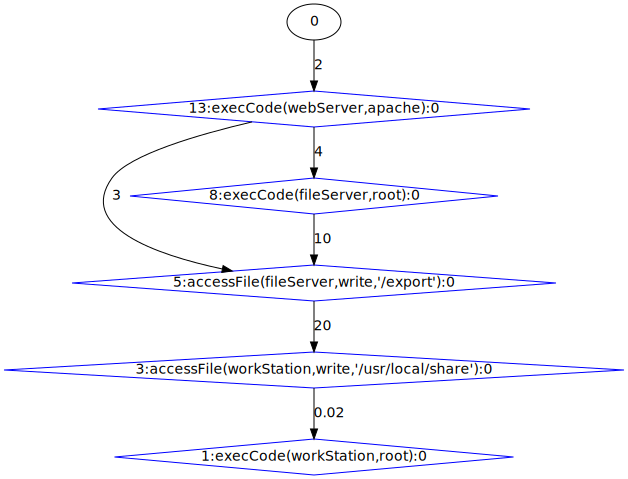

In [7]:
ag = AttackGraph()
ag.load_dot_file('/opt/projects/diss/py-mulval/data/mulval_ag/small_enterprise/AttackGraph.dot')
ag.name = 'small_enterprise'
ag.load_score_dict('/opt/projects/diss/py-mulval/src/py_mulval/data/secmet/scoreDict_mttf.yml')
ag.PLOT_INTERMEDIATE_GRAPHS = False

# tgraph, tmatrix, nodelist = ag.getTransMatrix()
reduced_ag = ag.getReducedGraph()
plot_ag(reduced_ag)
# print(tmatrix.todense())

plot_ag(reduced_ag)

In [8]:
# if reduced_ag.origin:
# reduced_ag.remove_node(reduced_ag.origin)
nodelist = reduced_ag.getNodeList(includeSource=True)
tmatrix  = nx.adjacency_matrix(reduced_ag, nodelist)
print(tmatrix.todense())
print(np.vstack((nodelist, tmatrix.todense())))

[[ 0.    2.    0.    0.    0.    0.  ]
 [ 0.    0.    4.    3.    0.    0.  ]
 [ 0.    0.    0.   10.    0.    0.  ]
 [ 0.    0.    0.    0.   20.    0.  ]
 [ 0.    0.    0.    0.    0.    0.02]
 [ 0.    0.    0.    0.    0.    0.  ]]
[['0' '13' '8' '5' '3' '1']
 ['0.0' '2.0' '0.0' '0.0' '0.0' '0.0']
 ['0.0' '0.0' '4.0' '3.0' '0.0' '0.0']
 ['0.0' '0.0' '0.0' '10.0' '0.0' '0.0']
 ['0.0' '0.0' '0.0' '0.0' '20.0' '0.0']
 ['0.0' '0.0' '0.0' '0.0' '0.0' '0.02']
 ['0.0' '0.0' '0.0' '0.0' '0.0' '0.0']]
